# Импортируем библиотеки и модули

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Стандартизация данных

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Вывод первых 25 изображений из обучающей выборки

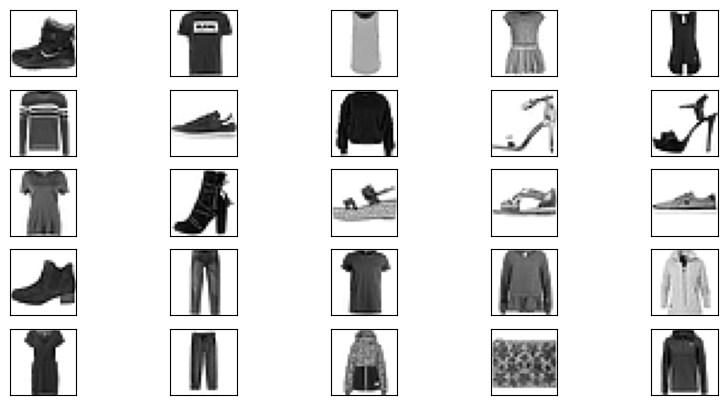

In [ ]:
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

# Формирование модели НС и вывод ее структуры в консоль

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [ ]:
model.fit(x_train, y_train_cat, batch_size=30, epochs=10, validation_split=0.2)

Epoch 1/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5171 - accuracy: 0.8166 - val_loss: 0.4204 - val_accuracy: 0.8500
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3862 - accuracy: 0.8607 - val_loss: 0.3739 - val_accuracy: 0.8673
Epoch 3/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.3493 - accuracy: 0.8733 - val_loss: 0.3654 - val_accuracy: 0.8738
Epoch 4/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.3210 - accuracy: 0.8832 - val_loss: 0.4009 - val_accuracy: 0.8555
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.8893 - val_loss: 0.3453 - val_accuracy: 0.8762
Epoch 6/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.2848 - accuracy: 0.8950 - val_loss: 0.3413 - val_accuracy: 0.8763
Epoch 7/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.8984 - val_loss: 0.3509 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8793


[0.3519371747970581, 0.8792999982833862]

# Проверка распознавания цифр

1/1 [==============================] - 0s 42ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Распознание: Pullover


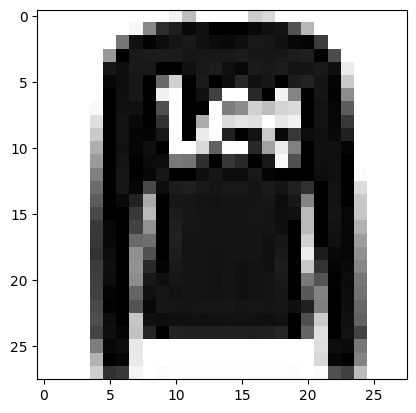

In [ ]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Распознание: {class_name[np.argmax(res)]}')

plt.imshow(x_test[n], cmap=plt.cm.binary)

# Распознавание всей тестовой выборки

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
(10000,)
[9 2 1 1 6 1 4 6 5 7 4 5 8 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


# Выделение неверных вариантов

In [ ]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(1401, 28, 28)


# Вывод первых 5 неверных результатов

Значение сети: Ankle boot


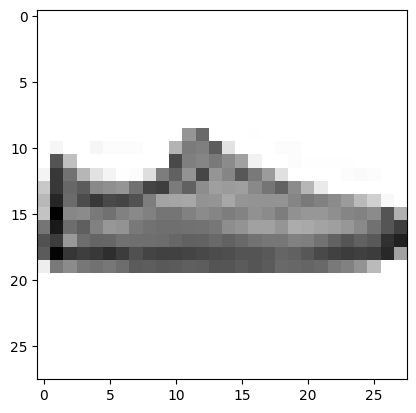

Значение сети: Pullover


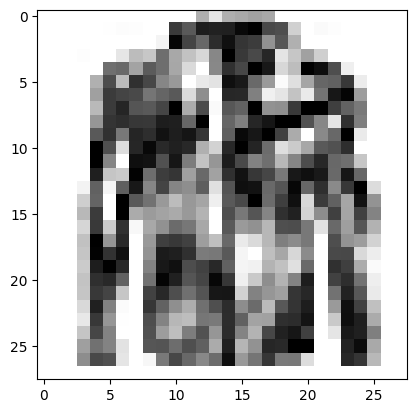

Значение сети: Trouser


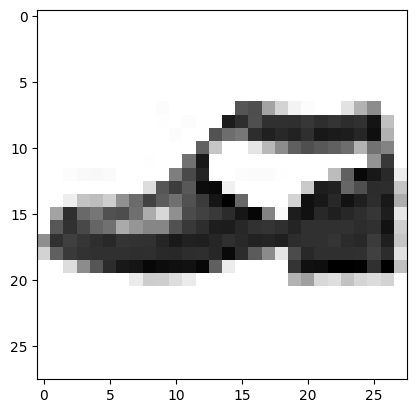

Значение сети: Trouser


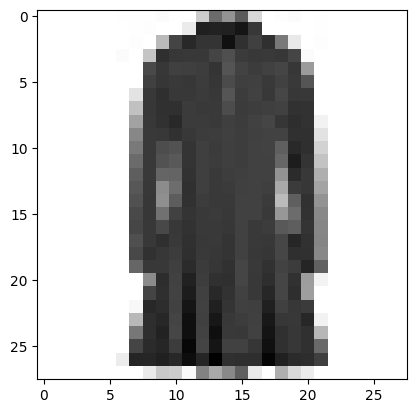

Значение сети: Shirt


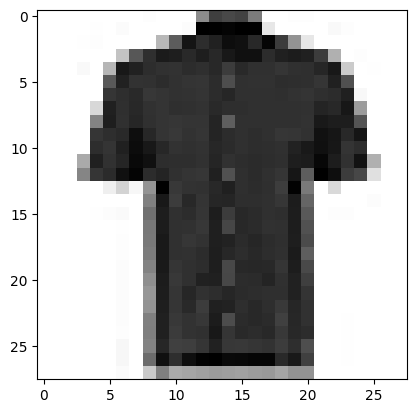

In [ ]:
for i in range(5):
  print(f'Значение сети: {class_name[y_test[i]]}')
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()